In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency,ttest_ind

df = pd.DataFrame(pd.read_csv('/content/vehicle.csv'))
df = df.drop('PolicyNumber',axis=1)
df = df[df['MonthClaimed']!='0']
for name,data in df.iteritems():
  print(name)
  if data.dtype=='object':
    print(data.unique())
  else:
    print("Max:",max(data),"Min:",min(data))
  print()


Month
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

WeekOfMonth
Max: 5 Min: 1

DayOfWeek
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Make
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

AccidentArea
['Urban' 'Rural']

DayOfWeekClaimed
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday']

MonthClaimed
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct']

WeekOfMonthClaimed
Max: 5 Min: 1

Sex
['Female' 'Male']

MaritalStatus
['Single' 'Married' 'Widow' 'Divorced']

Age
Max: 80 Min: 0

Fault
['Policy Holder' 'Third Party']

PolicyType
['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']

VehicleCategory
['Sport' 'Utility' 'Sedan']

Veh

<ipython-input-54-84a63edeac43>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name,data in df.iteritems():


In [42]:
fraud = df[df['FraudFound_P']==1]
nofraud = df[df['FraudFound_P']==0]

nofraud = nofraud[:1000]

newdf = pd.concat([fraud, nofraud], ignore_index=True)

In [43]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 1923 non-null   object
 1   WeekOfMonth           1923 non-null   int64 
 2   DayOfWeek             1923 non-null   object
 3   Make                  1923 non-null   object
 4   AccidentArea          1923 non-null   object
 5   DayOfWeekClaimed      1923 non-null   object
 6   MonthClaimed          1923 non-null   object
 7   WeekOfMonthClaimed    1923 non-null   int64 
 8   Sex                   1923 non-null   object
 9   MaritalStatus         1923 non-null   object
 10  Age                   1923 non-null   int64 
 11  Fault                 1923 non-null   object
 12  PolicyType            1923 non-null   object
 13  VehicleCategory       1923 non-null   object
 14  VehiclePrice          1923 non-null   object
 15  FraudFound_P          1923 non-null   

In [55]:
df_majority = df[df['FraudFound_P'] == 0]
df_minority = df[df['FraudFound_P'] == 1]

# Oversample the minority class to match the number of majority class instances
df_minority_oversampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)

# Combine the oversampled minority class with the majority class
equaldf = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the rows in the balanced DataFrame to randomize the order
equaldf = equaldf.sample(frac=1, random_state=42)

Month :


<ipython-input-45-760d68a13680>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name,data in equaldf.iteritems():


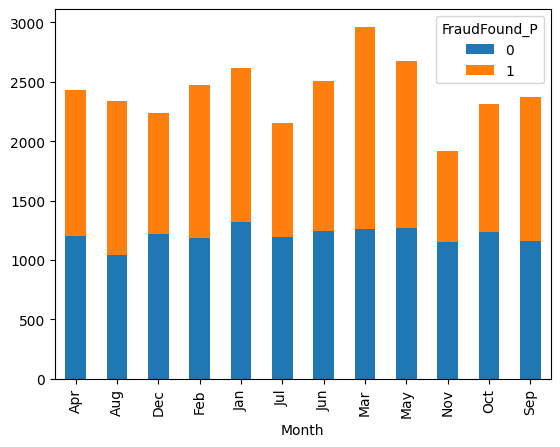

FraudFound_P          0          1
Month                             
Apr           49.362402  50.637598
Aug           44.610778  55.389222
Dec           54.720358  45.279642
Feb           47.857720  52.142280
Jan           50.669728  49.330272
Jul           55.648536  44.351464
Jun           49.501396  50.498604
Mar           42.456969  57.543031
May           47.571001  52.428999
Nov           60.124935  39.875065
Oct           53.463203  46.536797
Sep           49.010526  50.989474
Chi2 value: 10.6058426394608
p-values: 0.47685018094559595
WeekOfMonth :


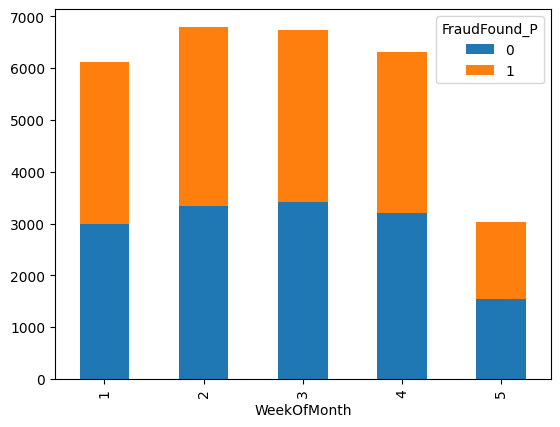

FraudFound_P          0          1
WeekOfMonth                       
1             48.831126  51.168874
2             49.021915  50.978085
3             50.793415  49.206585
4             50.784096  49.215904
5             51.158173  48.841827
Chi2 value: 0.1935721419172477
p-values: 0.9956077527732644
DayOfWeek :


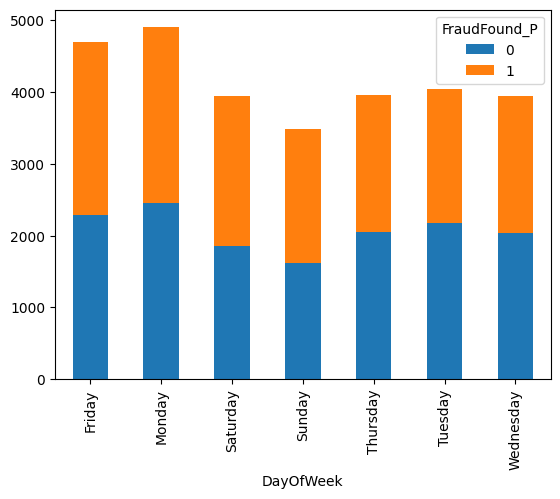

FraudFound_P          0          1
DayOfWeek                         
Friday        48.713587  51.286413
Monday        50.071356  49.928644
Saturday      46.847303  53.152697
Sunday        46.611143  53.388857
Thursday      51.895854  48.104146
Tuesday       53.813873  46.186127
Wednesday     51.773050  48.226950
Chi2 value: 1.7742684500823727
p-values: 0.9392448402628895
Make :


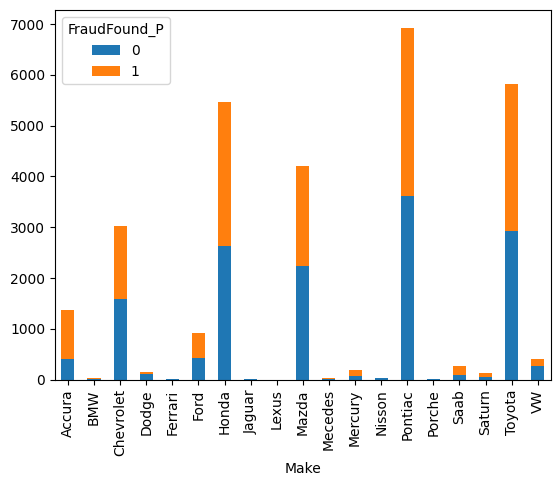

FraudFound_P           0          1
Make                               
Accura         30.145985  69.854015
BMW            53.846154  46.153846
Chevrolet      52.532274  47.467726
Dodge          75.886525  24.113475
Ferrari       100.000000   0.000000
Ford           44.983819  55.016181
Honda          47.881665  52.118335
Jaguar        100.000000   0.000000
Lexus         100.000000   0.000000
Mazda          53.068506  46.931494
Mecedes        13.636364  86.363636
Mercury        41.847826  58.152174
Nisson         70.731707  29.268293
Pontiac        52.279284  47.720716
Porche        100.000000   0.000000
Saab           36.466165  63.533835
Saturn         37.956204  62.043796
Toyota         50.377618  49.622382
VW             67.567568  32.432432
Chi2 value: 493.357340405579
p-values: 2.5977928607458102e-93
AccidentArea :


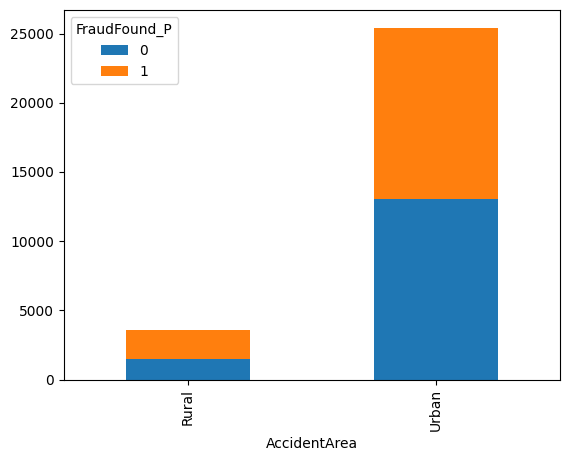

FraudFound_P          0          1
AccidentArea                      
Rural         41.140129  58.859871
Urban         51.240514  48.759486
Chi2 value: 1.6660121508107895
p-values: 0.19679352647285553
DayOfWeekClaimed :


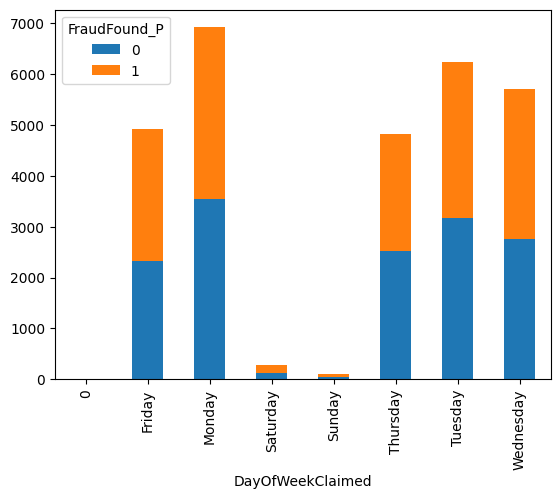

FraudFound_P               0          1
DayOfWeekClaimed                       
0                 100.000000   0.000000
Friday             47.447631  52.552369
Monday             51.163127  48.836873
Saturday           41.489362  58.510638
Sunday             48.039216  51.960784
Thursday           52.112676  47.887324
Tuesday            50.962464  49.037536
Wednesday          48.397267  51.602733
Chi2 value: 96.78779243209071
p-values: 4.962960064576678e-18
MonthClaimed :


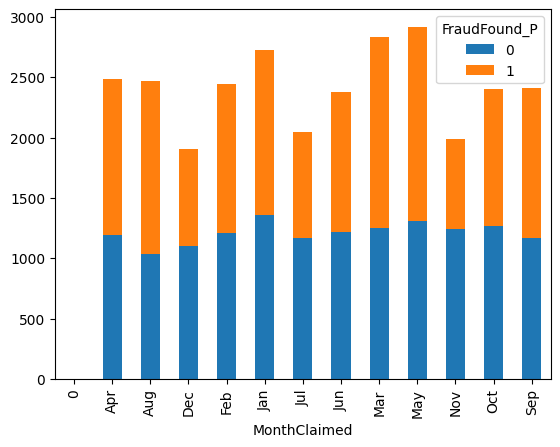

FraudFound_P           0          1
MonthClaimed                       
0             100.000000   0.000000
Apr            47.885622  52.114378
Aug            41.879303  58.120697
Dec            57.645822  42.354178
Feb            49.447853  50.552147
Jan            49.761117  50.238883
Jul            57.052221  42.947779
Jun            51.136364  48.863636
Mar            44.158136  55.841864
May            44.874871  55.125129
Nov            62.386707  37.613293
Oct            52.750000  47.250000
Sep            48.278723  51.721277
Chi2 value: 106.92698784683704
p-values: 2.420824650684996e-17
WeekOfMonthClaimed :


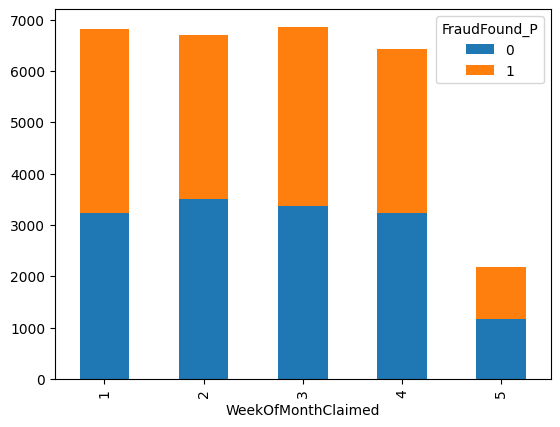

FraudFound_P                0          1
WeekOfMonthClaimed                      
1                   47.360704  52.639296
2                   52.425735  47.574265
3                   49.023039  50.976961
4                   50.124378  49.875622
5                   53.501144  46.498856
Chi2 value: 0.9957810306946657
p-values: 0.9104350469492706
Sex :


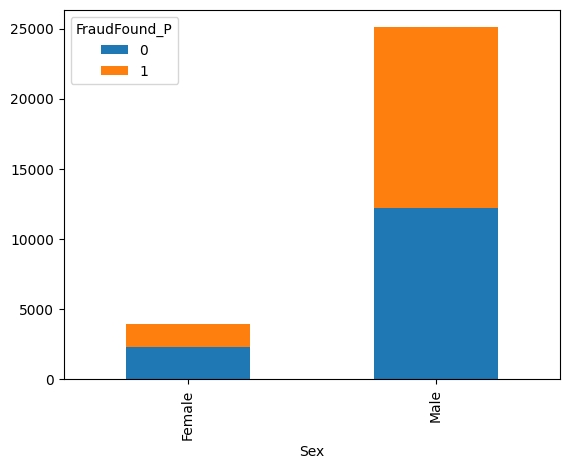

FraudFound_P          0          1
Sex                               
Female        59.071192  40.928808
Male          48.582253  51.417747
Chi2 value: 1.8114094056278613
p-values: 0.17833925087785513
MaritalStatus :


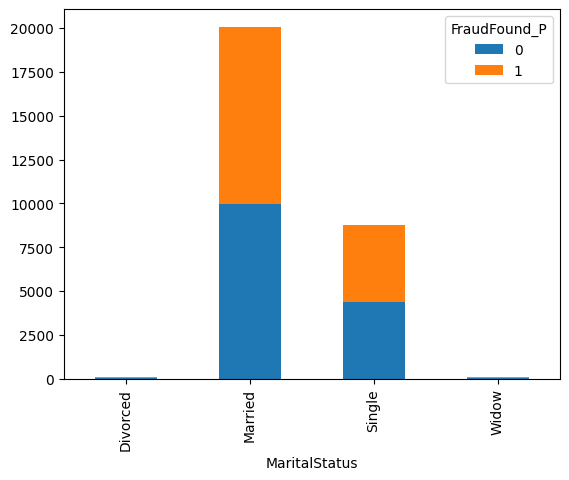

FraudFound_P           0          1
MaritalStatus                      
Divorced       63.478261  36.521739
Married        49.778177  50.221823
Single         50.406132  49.593868
Widow          41.558442  58.441558
Chi2 value: 9.859632476303162
p-values: 0.019797780001890225
Fault :


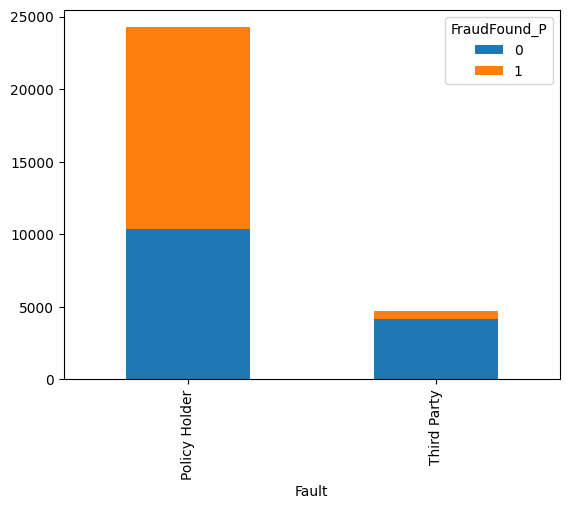

FraudFound_P           0          1
Fault                              
Policy Holder  42.625788  57.374212
Third Party    87.856992  12.143008
Chi2 value: 43.13620291763251
p-values: 5.1058683867528517e-11
PolicyType :


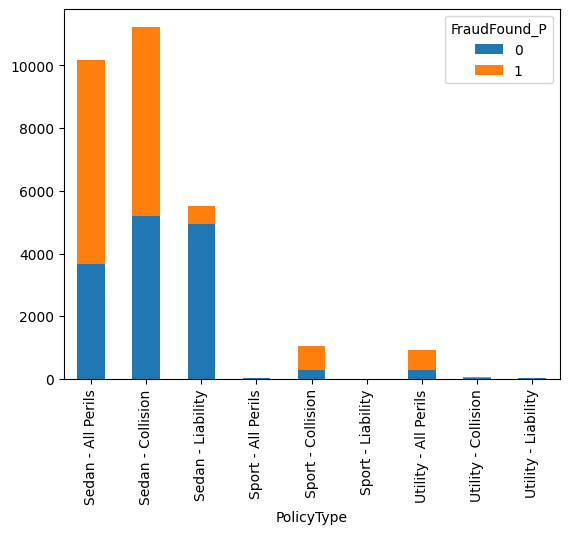

FraudFound_P                   0          1
PolicyType                                 
Sedan - All Perils     36.166863  63.833137
Sedan - Collision      46.325167  53.674833
Sedan - Liability      89.920087  10.079913
Sport - All Perils    100.000000   0.000000
Sport - Collision      28.382214  71.617786
Sport - Liability     100.000000   0.000000
Utility - All Perils   32.429501  67.570499
Utility - Collision    35.526316  64.473684
Utility - Liability   100.000000   0.000000
Chi2 value: 374.78587380399665
p-values: 4.606393053085237e-76
VehicleCategory :


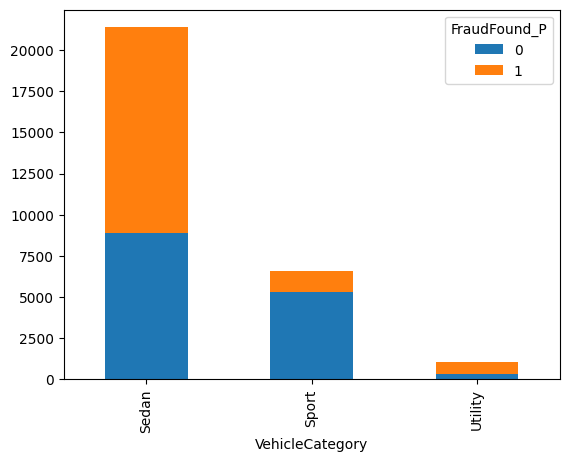

FraudFound_P             0          1
VehicleCategory                      
Sedan            41.497966  58.502034
Sport            80.078955  19.921045
Utility          34.052993  65.947007
Chi2 value: 48.89967932346742
p-values: 2.407518047917043e-11
VehiclePrice :


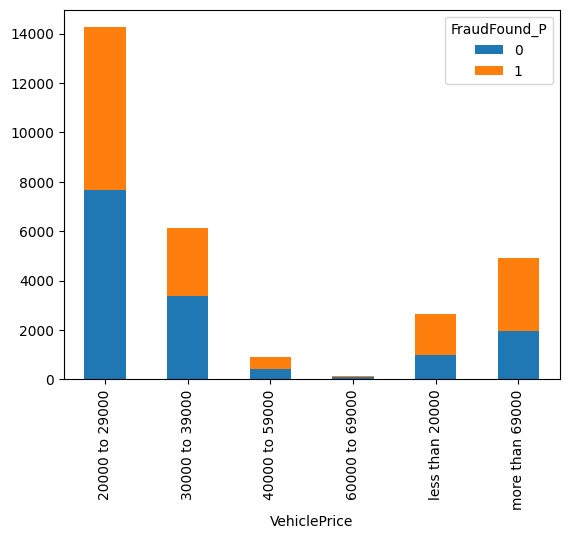

FraudFound_P             0          1
VehiclePrice                         
20000 to 29000   53.732809  46.267191
30000 to 39000   54.717289  45.282711
40000 to 59000   48.314607  51.685393
60000 to 69000   59.712230  40.287770
less than 20000  37.514167  62.485833
more than 69000  40.068980  59.931020
Chi2 value: 15.285808460232932
p-values: 0.009208444478459503
PolicyNumber :


KeyboardInterrupt: ignored

In [45]:
count = 0
for name,data in equaldf.iteritems():
  if name=='Age' or name=='FraudFound_P':
    continue

  print(name,":")
  ctable = pd.crosstab(index=equaldf[name],columns=equaldf['FraudFound_P'])
  for i, row in ctable.iterrows():
    total = row[0] + row[1]  # Calculate the sum of 0s and 1s in the row
    ctable.at[i, 0] = (row[0] / total) * 100  # Calculate the percentage of 0s
    ctable.at[i, 1] = (row[1] / total) * 100  # Calculate the percentage of 1s

  # ctable.set_index(name)[[0,1]].plot(kind='bar', stacked=True)
  # plt.xlabel('Category')  # Label for the x-axis
  # plt.ylabel('Percentage')  # Label for the y-axis
  # plt.title('Percentage Contingency Table')  # Title for the plot
  # plt.show()
  equaldf.groupby([name, 'FraudFound_P']).size().unstack().plot(kind='bar', stacked=True)
  plt.show()


  print(ctable)

  chi2, p, dof, expected = chi2_contingency(ctable)
  print("Chi2 value:",chi2)
  print("p-values:",p)

  if p<=0.05:
    count += 1

print("Count: ",count)

In [56]:
df_majority = df[df['FraudFound_P'] == 0]
df_minority = df[df['FraudFound_P'] == 1]

# Oversample the minority class to match the number of majority class instances
df_minority_oversampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)

# Combine the oversampled minority class with the majority class
equaldf = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the rows in the balanced DataFrame to randomize the order
equaldf = equaldf.sample(frac=1, random_state=42)

In [57]:
equaldf[['Month']] = equaldf[['Month']].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4,
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })


equaldf[['DayOfWeek']] = equaldf[['DayOfWeek']].replace( {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday' : 6
    })


equaldf[['Make']] = equaldf[['Make']].replace( {
    'Lexus': 0,
    'Ferrari': 1,
    'Mecedes': 2,
    'Porche': 3,
    'Jaguar': 4,
    'BMW': 5,
    'Nisson': 6,
    'Saturn': 7,
    'Mercury':8,
    'Dodge' : 9,
    'Saab' : 10,
    'VW' : 11,
    'Ford': 12,
    'Accura': 13,
    'Chevrolet': 14,
    'Mazda' : 15,
    'Honda' : 16,
    'Toyota' : 17,
    'Pontiac': 18
    })

equaldf[['AccidentArea']] = equaldf[['AccidentArea']].replace( {
    'Rural' : 0,
    'Urban' : 1
    })


equaldf[['DayOfWeekClaimed']] = equaldf[['DayOfWeekClaimed']].replace( {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday' : 6
    })


equaldf[['MonthClaimed']] = equaldf[['MonthClaimed']].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4,
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })


equaldf[['Sex']] = equaldf[['Sex']].replace( {
    'Female' : 0,
    'Male' : 1
    })


equaldf[['MaritalStatus']] = equaldf[['MaritalStatus']].replace( {
    'Widow' : 0,
    'Divorced' : 1,
    'Single' : 2,
    'Married' : 3
    })


equaldf[['Fault']] = equaldf[['Fault']].replace( {
    'Third Party' : 0,
    'Policy Holder' : 1
    })


equaldf[['PolicyType']] = equaldf[['PolicyType']].replace( {
    'Sport - Liability' : 0,
    'Sport - All Perils' : 1,
    'Utility - Liability' : 2,
    'Utility - Collision' :3,
    'Utility - All Perils' :4,
    'Sport - Collision' : 5,
    'Sedan - All Perils' : 6 ,
    'Sedan - Liability' : 7,
    'Sedan - Collision' : 8
    })


equaldf[['VehicleCategory']] = equaldf[['VehicleCategory']].replace( {
    'Utility' : 0,
    'Sport' : 1,
    'Sedan' : 2
    })


equaldf[['VehiclePrice']] = equaldf[['VehiclePrice']].replace( {
    'less than 20000' : 0,
    '20000 to 29000': 1,
    '30000 to 39000': 2,
    '40000 to 59000': 3,
    '60000 to 69000' : 4,
    'more than 69000' : 5
    })


equaldf[['Days_Policy_Accident']] = equaldf[['Days_Policy_Accident']].replace( {
    'none' : 0,
    '1 to 7' : 1,
    '8 to 15' : 2,
    '15 to 30' :3,
    'more than 30' :4
    })


equaldf[['Days_Policy_Claim']] = equaldf[['Days_Policy_Claim']].replace( {
    '8 to 15' : 0,
    '15 to 30' : 1,
    'more than 30' : 2
    })


equaldf[['PastNumberOfClaims']] = equaldf[['PastNumberOfClaims']].replace( {
    'none': 0,
    '1': 1,
    '2 to 4': 2,
    'more than 4': 3
    })


equaldf[['AgeOfVehicle']] = equaldf[['AgeOfVehicle']].replace({
    'new' : 0,
    '2 years' : 1,
    '3 years' : 2,
    '4 years' : 3,
    '5 years' : 4,
    '6 years' : 5,
    '7 years' : 6,
    'more than 7' : 7
    })


equaldf[['AgeOfPolicyHolder']] = equaldf[['AgeOfPolicyHolder']].replace({
    '18 to 20' : 0,
    '21 to 25' : 1,
    '26 to 30' : 2,
    '31 to 35' : 3,
    '36 to 40' : 4,
    '41 to 50' : 5,
    '51 to 65' : 6,
    'over 65' : 7
    })


equaldf[['PoliceReportFiled']] = equaldf[['PoliceReportFiled']].replace({
    'Yes' : 0,
    'No' : 1
    })


equaldf[['WitnessPresent']] = equaldf[['WitnessPresent']].replace({
    'Yes' : 0,
    'No' : 1
    })


equaldf[['AgentType']] = equaldf[['AgentType']].replace({
    'Internal' : 0,
    'External' : 1
    })


equaldf[['NumberOfSuppliments']] = equaldf[['NumberOfSuppliments']].replace({
    'none' : 0,
    '1 to 2' : 1,
    '3 to 5' : 2,
    'more than 5' : 3
    })


equaldf[['AddressChange_Claim']] = equaldf[['AddressChange_Claim']].replace({
    'no change' : 0,
    'under 6 months' : 1,
    '1 year' : 2,
    '2 to 3 years' : 3,
    '4 to 8 years' : 4
    })


equaldf[['NumberOfCars']] = equaldf[['NumberOfCars']].replace({
    '1 vehicle' : 0,
    '2 vehicles' : 1,
    '3 to 4' : 2,
    '5 to 8' : 3,
    'more than 8' : 4
    })


equaldf[['BasePolicy']] = equaldf[['BasePolicy']].replace({
    'All Perils' : 0,
    'Liability' : 1,
    'Collision' : 2
    })




In [58]:

equaldf.drop(columns=['AgeOfPolicyHolder'], inplace=True)
# equaldf.drop(columns=['PolicyNumber'], inplace=True)

In [59]:
columns_to_drop=["Month","WeekOfMonth","DayOfWeek","Make","DayOfWeekClaimed"   ,"MonthClaimed","WeekOfMonthClaimed","MaritalStatus","RepNumber","Days_Policy_Accident","PastNumberOfClaims","DriverRating","Days_Policy_Claim","AgeOfVehicle","WitnessPresent","NumberOfSuppliments","NumberOfCars","Year"]
equaldf=equaldf.drop(columns=columns_to_drop,axis=1)


In [60]:
equaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28992 entries, 3085 to 3549
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   AccidentArea         28992 non-null  int64
 1   Sex                  28992 non-null  int64
 2   Age                  28992 non-null  int64
 3   Fault                28992 non-null  int64
 4   PolicyType           28992 non-null  int64
 5   VehicleCategory      28992 non-null  int64
 6   VehiclePrice         28992 non-null  int64
 7   FraudFound_P         28992 non-null  int64
 8   Deductible           28992 non-null  int64
 9   PoliceReportFiled    28992 non-null  int64
 10  AgentType            28992 non-null  int64
 11  AddressChange_Claim  28992 non-null  int64
 12  BasePolicy           28992 non-null  int64
dtypes: int64(13)
memory usage: 3.1 MB


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [62]:

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder



X = equaldf.drop('FraudFound_P', axis=1)
y = equaldf['FraudFound_P']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)


knn_classifier.fit(X_train, y_train)


y_pred = knn_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 81.79%


In [63]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

auc_score = roc_auc_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred.round())
classification_rep = classification_report(y_test,y_pred.round())

print("Auc Score: ",auc_score)
print("Confusion matrix:")
print(conf_matrix)
print("Report:")
print(classification_report)

Auc Score:  0.8184011253963832
Confusion matrix:
[[2193  728]
 [ 328 2550]]
Report:
<function classification_report at 0x7be596e8b5b0>


In [64]:
import math

In [65]:
for column in equaldf.columns:
    if column != 'FraudFound_P':  # Exclude the target variable
        class_counts = equaldf.groupby([column, 'FraudFound_P']).size().unstack(fill_value=0)
        total_samples = class_counts.sum(axis=1)
        proportions = class_counts.div(total_samples, axis=0)
        entropies = -(proportions * (proportions.applymap(lambda x: math.log2(x) if x != 0 else 0))).sum(axis=1)

        print(f"Entropy for '{column}': {entropies.mean():.3f}")

Entropy for 'AccidentArea': 0.988
Entropy for 'Sex': 0.988
Entropy for 'Age': 0.910
Entropy for 'Fault': 0.759
Entropy for 'PolicyType': 0.569
Entropy for 'VehicleCategory': 0.875
Entropy for 'VehiclePrice': 0.981
Entropy for 'Deductible': 0.855
Entropy for 'PoliceReportFiled': 0.978
Entropy for 'AgentType': 0.916
Entropy for 'AddressChange_Claim': 0.782
Entropy for 'BasePolicy': 0.802


In [66]:
import pandas as pd
import math

target_column = 'FraudFound_P'

# Define a function to calculate entropy
def entropy(class_counts):
    total_samples = sum(class_counts)
    proportions = [count / total_samples for count in class_counts]
    entropy = sum([-p * math.log2(p) if p != 0 else 0 for p in proportions])
    return entropy

# Define a function to calculate information gain for a specific attribute
def information_gain(data, attribute, target):
    class_counts = data[target].value_counts()
    total_entropy = entropy(class_counts)

    weighted_entropy = 0
    for value in data[attribute].unique():
        subset = data[data[attribute] == value]
        class_counts_subset = subset[target].value_counts()
        weighted_entropy += len(subset) / len(data) * entropy(class_counts_subset)

    information_gain = total_entropy - weighted_entropy
    return information_gain

# Calculate information gain for each attribute except 'Fraud'
information_gains = {}
for attribute in equaldf.columns:
    if attribute != 'FraudFound_P':
        gain = information_gain(equaldf, attribute, target_column)
        information_gains[attribute] = gain

# Display the information gains
for attribute, gain in information_gains.items():
    print(f'Information Gain for {attribute}: {gain:.3f}')


Information Gain for AccidentArea: 0.003
Information Gain for Sex: 0.004
Information Gain for Age: 0.025
Information Gain for Fault: 0.089
Information Gain for PolicyType: 0.131
Information Gain for VehicleCategory: 0.082
Information Gain for VehiclePrice: 0.013
Information Gain for Deductible: 0.008
Information Gain for PoliceReportFiled: 0.001
Information Gain for AgentType: 0.002
Information Gain for AddressChange_Claim: 0.010
Information Gain for BasePolicy: 0.126
